In [1]:
import os # os
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Pandas
import tensorflow as tf # Tensorflow
from tensorflow import keras # Keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Printing all input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/model-96-acc/Trial 3.h5
/kaggle/input/model-2-acc/Trial 11.h5
/kaggle/input/attempt2data/DataForAttempt2.csv
/kaggle/input/all-data-normalized/DataForClassificationAttempt808.csv


In [2]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-zhgd7whm
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-zhgd7whm
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13737 sha256=150415a0ab4a5b3d9f4ac4fdf8996baf2ac1c5136122e7b4bc443bd8a76afb26
  Stored in directory: /tmp/pip-ephem-wheel-cache-j7x3n6td/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


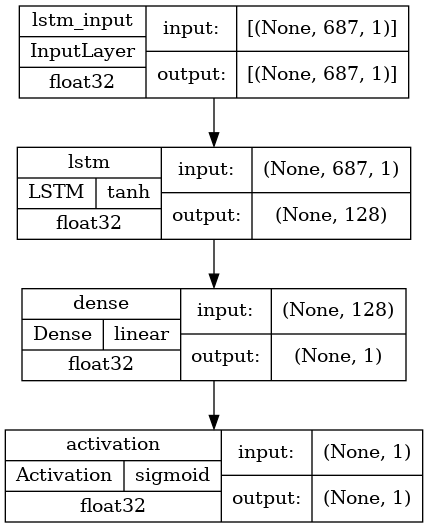

In [5]:
model = keras.models.load_model('/kaggle/input/model-2-acc/Trial 11.h5')
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [4]:
path = "/kaggle/input/attempt2data/DataForAttempt2.csv"
df = pd.read_csv(path).values
df = df[:, 1:]
print(df.shape)
df3 = pd.DataFrame(df)
df3 = df3.dropna()
df = df3.values
print(df.shape)
df

(8126, 690)
(8125, 690)


array([[2, 'CFHTLS-VAR-J141655.02+521045.5', 21.184, ..., 20.711, 20.711,
        20.711],
       [2, 'CFHTLS-VAR-J022451.91-043221.4', 18.986, ..., 19.696, 19.696,
        19.696],
       [2, 'CFHTLS-VAR-J022755.02-043034.1', 20.604, ..., 20.814, 20.814,
        20.814],
       ...,
       [1, 'CFHTLS-VAR-J221527.69-180139.4', 18.491, ..., 18.487, 18.487,
        18.487],
       [1, 'CFHTLS-VAR-J221657.48-180557.0', 16.978, ..., 16.988, 16.988,
        16.988],
       [1, 'CFHTLS-VAR-J221623.51-175800.5', 18.059, ..., 18.061, 18.061,
        18.061]], dtype=object)

In [6]:
X = df[:, 3:]
y = df[:, 0:1] -1 

In [8]:
temp = pd.DataFrame(X)
temp = temp.ffill(axis = 1)
X = temp.values
X_mean = np.mean(X, axis=1, keepdims=True)
X_std = np.std(X, axis=1, keepdims=True)

X = (X - X_mean) / X_std

In [9]:
X

array([[ 1.45594496,  1.45594496,  1.45594496, ..., -0.49073256,
        -0.49073256, -0.49073256],
       [-3.4808649 , -3.49154777, -3.49154777, ...,  0.34360109,
         0.34360109,  0.34360109],
       [-1.10565269, -1.1215607 , -1.1215607 , ..., -0.5409185 ,
        -0.5409185 , -0.5409185 ],
       ...,
       [-0.21907168, -0.21907168, -0.21907168, ..., -0.96321132,
        -0.96321132, -0.96321132],
       [-1.38986143, -1.38986143, -1.38986143, ...,  0.68226271,
         0.68226271,  0.68226271],
       [-2.02004983, -0.03467897, -2.02004983, ..., -0.03467897,
        -0.03467897, -0.03467897]])

In [10]:
model = keras.models.load_model('/kaggle/input/model-2-acc/Trial 11.h5')

In [14]:
X_eval = np.asarray(X, dtype = np.float32)
pre = model.predict(X_eval)
num_correct = 0
num_incorrect = 0
predictions = [] 

for i in range(0, len(pre)):
    
    #print(pre[i][0])
    if(pre[i][0] > 0.50):
        predictions.append(1)
    else:
        predictions.append(0)
    
for i in range(0, len(pre)):
    if(predictions[i] == y[i]):
        num_correct += 1 
    else:
        num_incorrect += 1
print("Maximum Probability", num_correct/(num_incorrect + num_correct))

254/254 [==============================] - 10s 15ms/step
Maximum Probability 0.9748923076923077


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_eval = np.asarray(y, dtype = np.float32)
model.evaluate(X_eval, y_eval)

254/254 [==============================] - 4s 14ms/step - loss: 0.0796 - binary_accuracy: 0.9749


[0.07955155521631241, 0.9748923182487488]

In [ ]:
!pip install git+https://github.com/paulgavrikov/visualkeras

In [ ]:
model = keras.models.load_model('/kaggle/input/model-2-acc/Trial 11.h5')
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [16]:
path2 = "/kaggle/input/all-data-normalized/DataForClassificationAttempt808.csv"
dfClass = pd.read_csv(path2).values
dfClass = dfClass[:, 1:]
dfClass

array([['CFHTLS-VAR-J141730.05+524543.8.mjdmag', 23.839, 23.778, ...,
        23.516, 23.516, 23.516],
       ['CFHTLS-VAR-J022436.49-040403.8.mjdmag', 19.973, 19.973, ...,
        19.971, 19.973, 19.973],
       ['CFHTLS-VAR-J141810.76+523719.4.mjdmag', 23.402, 23.402, ...,
        23.408, 23.408, 23.408],
       ...,
       ['CFHTLS-VAR-J221717.93-174538.4.mjdmag', 22.378, 22.378, ...,
        22.424, 22.424, 22.424],
       ['CFHTLS-VAR-J221602.40-173651.9.mjdmag', 23.649, 23.649, ...,
        23.617, 23.617, 23.617],
       ['CFHTLS-VAR-J022720.61-041123.3.mjdmag', 23.519, 23.478, ...,
        23.262, 23.262, 23.262]], dtype=object)

In [19]:
X2 = dfClass[:, 1:]

X2 = X2.astype(float)
X2_mean = np.mean(X2, axis=1, keepdims=True)
X2_std = np.std(X2, axis=1, keepdims=True)

X2 = (X2 - X2_mean) / X2_std

/tmp/ipykernel_30/756567836.py:7: RuntimeWarning: invalid value encountered in divide
  X2 = (X2 - X2_mean) / X2_std


In [20]:
names = dfClass[:, :1]
print(names.shape)
print(X2.shape)
X2

(27786, 1)
(27786, 573)


array([[ 0.91099876,  0.35033848,  0.35033848, ..., -2.05774335,
        -2.05774335, -2.05774335],
       [ 0.22239795,  0.22239795, -0.07674295, ..., -0.07674295,
         0.22239795,  0.22239795],
       [-0.37243766, -0.37243766, -0.22368067, ..., -0.19392927,
        -0.19392927, -0.19392927],
       ...,
       [-0.86697422, -0.86697422, -0.86697422, ...,  0.45860769,
         0.45860769,  0.45860769],
       [ 0.42041232,  0.42041232,  0.42041232, ..., -0.23980354,
        -0.23980354, -0.23980354],
       [ 1.86976321,  1.45032651,  1.1741121 , ..., -0.75938877,
        -0.75938877, -0.75938877]])

In [21]:
X_eval_norm = np.asarray(X2, dtype = np.float32)
predictions = model.predict(X_eval_norm)
predictions

869/869 [==============================] - 9s 10ms/step


array([[0.00031775],
       [0.00681965],
       [0.00236259],
       ...,
       [0.00570043],
       [0.00259947],
       [0.00487309]], dtype=float32)

In [22]:
predictionList = list(predictions)
namesList = list(names)
QUASAR_LIST = [] 
for i in range(0, len(predictionList)):
    if(predictionList[i] > 0.5):
        QUASAR_LIST.append(namesList[i])
print(len(QUASAR_LIST))

992


In [25]:
QUASARS = pd.DataFrame(QUASAR_LIST)
QUASARS

,0
0,CFHTLS-VAR-J022501.11-042316.7.mjdmag
1,CFHTLS-VAR-J022531.41-041638.3.mjdmag
2,CFHTLS-VAR-J022515.74-045958.7.mjdmag
3,CFHTLS-VAR-J141937.69+524110.8.mjdmag
4,CFHTLS-VAR-J141851.55+521221.0.mjdmag
...,...
987,CFHTLS-VAR-J022449.87-043025.9.mjdmag
988,CFHTLS-VAR-J221530.62-174431.0.mjdmag
989,CFHTLS-VAR-J221414.85-175539.0.mjdmag
990,CFHTLS-VAR-J022644.15-043714.3.mjdmag


In [27]:
QUASARS.to_csv("DataClassified.csv")